In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.multitest import multipletests

In [3]:
ROOT = '/data1/wgs_APA/MAAPER_out/'

In [4]:
all_perturbations_redu = {}
all_perturbations_redi = {}
big_df_redu = None
big_df_redi = None
max_1 = 0
max_2 = 0
for perturbation in os.listdir(ROOT):
    try:
        name = perturbation.split('_')[0]
        df = pd.read_csv(ROOT + perturbation + '/gene.txt', sep='\t')
        # remove na from REDu column 
        df1 = df.dropna(subset=['REDu'])
        df2 = df.dropna(subset=['REDi'])
        p_adjusted = multipletests(df1['REDu.pval'], method='fdr_bh')[1]
        p_adjusted_redi = multipletests(df2['REDi.pval'], method='fdr_bh')[1]
        df1['p_adjusted'] = p_adjusted
        df2['p_adjusted'] = p_adjusted_redi
        df1 = df1[df1['p_adjusted'] < 0.1]
        df2 = df2[df2['p_adjusted'] < 0.1]
        # filter out non significant genes
        all_perturbations_redu[name] = df1
        all_perturbations_redi[name] = df2
        if len(all_perturbations_redu[name]) > max_1:
            max_1 = len(all_perturbations_redu[name])
            big_df_redu = df1
        if len(all_perturbations_redi[name]) > max_2:
            max_2 = len(all_perturbations_redi[name])
            big_df_redi = df2

    except:
        continue

In [5]:
perturbation_df_redu = pd.DataFrame(index=big_df_redu['gene'])
for perturbation in all_perturbations_redu:
    p_dict = dict(zip(all_perturbations_redu[perturbation]['gene'], all_perturbations_redu[perturbation]['REDu']))
    perturbation_df_redu[perturbation] = perturbation_df_redu.index.map(p_dict)
perturbation_df_redu = perturbation_df_redu.fillna(0)
perturbation_df_redu.head()

,CD8B,ZNF589,BYSL,IP6K2,EBF2,MEIS2,BUD23,NOS1AP,MYF6,TARBP2,...,TSTD2,WASHC4,NOBOX,OR7A17,PRKRIP1,PRICKLE3,ACSF3,ZNF77,PTRH2,ATP5MC1
gene,,,,,,,,,,,,,,,,,,,,,
AARS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCB7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# redi
perturbation_df_redi = pd.DataFrame(index=big_df_redi['gene'])
for perturbation in all_perturbations_redi:
    p_dict = dict(zip(all_perturbations_redi[perturbation]['gene'], all_perturbations_redi[perturbation]['REDi']))
    perturbation_df_redi[perturbation] = perturbation_df_redi.index.map(p_dict)
perturbation_df_redi = perturbation_df_redi.fillna(0)
perturbation_df_redi.head()

,CD8B,ZNF589,BYSL,IP6K2,EBF2,MEIS2,BUD23,NOS1AP,MYF6,TARBP2,...,TSTD2,WASHC4,NOBOX,OR7A17,PRKRIP1,PRICKLE3,ACSF3,ZNF77,PTRH2,ATP5MC1
gene,,,,,,,,,,,,,,,,,,,,,
ABCE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAD10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAP2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(perturbation_df_redu.shape)
print(perturbation_df_redi.shape)


(1657, 7652)
(1340, 7652)


In [8]:
# make union index for both dataframes, zero fill the nan values for missing genes 
union_index = list(set(perturbation_df_redu.index).union(set(perturbation_df_redi.index)))
len(union_index)
perturbation_df_redu = perturbation_df_redu.reindex(union_index).fillna(0)
perturbation_df_redi = perturbation_df_redi.reindex(union_index).fillna(0)

In [9]:
perturbation_df_redi

,CD8B,ZNF589,BYSL,IP6K2,EBF2,MEIS2,BUD23,NOS1AP,MYF6,TARBP2,...,TSTD2,WASHC4,NOBOX,OR7A17,PRKRIP1,PRICKLE3,ACSF3,ZNF77,PTRH2,ATP5MC1
gene,,,,,,,,,,,,,,,,,,,,,
PPP6R2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
SNRPD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,-1.24
CNOT10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
THAP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
SYF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WWC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
YWHAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.69,3.2,5.52,0.0,2.99,0.0,2.10
NFIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [10]:
df = perturbation_df_redu.copy()

In [18]:
rbp_df = pd.read_csv('/home/aiden/codes/APA_stuff/post_qual/APA/For_ALS_atlas_paper/all_rbp_hits.txt', sep='\t', header=None)
rbp_df.columns = ['rbp_name']
rbp_df.head()

,rbp_name
0,RBM46
1,SHEP
2,SNRNP70
3,Syncrip
4,Tv_0236


In [19]:
rbp_columns = list(set(rbp_df['rbp_name']).intersection(set(df.columns)))
rbp_redu = df[rbp_columns]
rbp_redu

,PPRC1,HNRNPC,SRSF9,CPEB4,SF1,SRSF1,SFPQ,PABPC4,RBM41,PABPN1,...,IGF2BP3,MBNL1,SNRPA,SRP54,KHDRBS1,CNOT4,HNRNPA1L2,RBM5,ZC3H14,SRSF2
gene,,,,,,,,,,,,,,,,,,,,,
PPP6R2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SNRPD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNOT10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
THAP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SYF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WWC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YWHAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NFIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# remove NA and inf values
rbp_df = rbp_df.replace([np.inf, -np.inf], np.nan)
rbp_df = rbp_df.dropna()

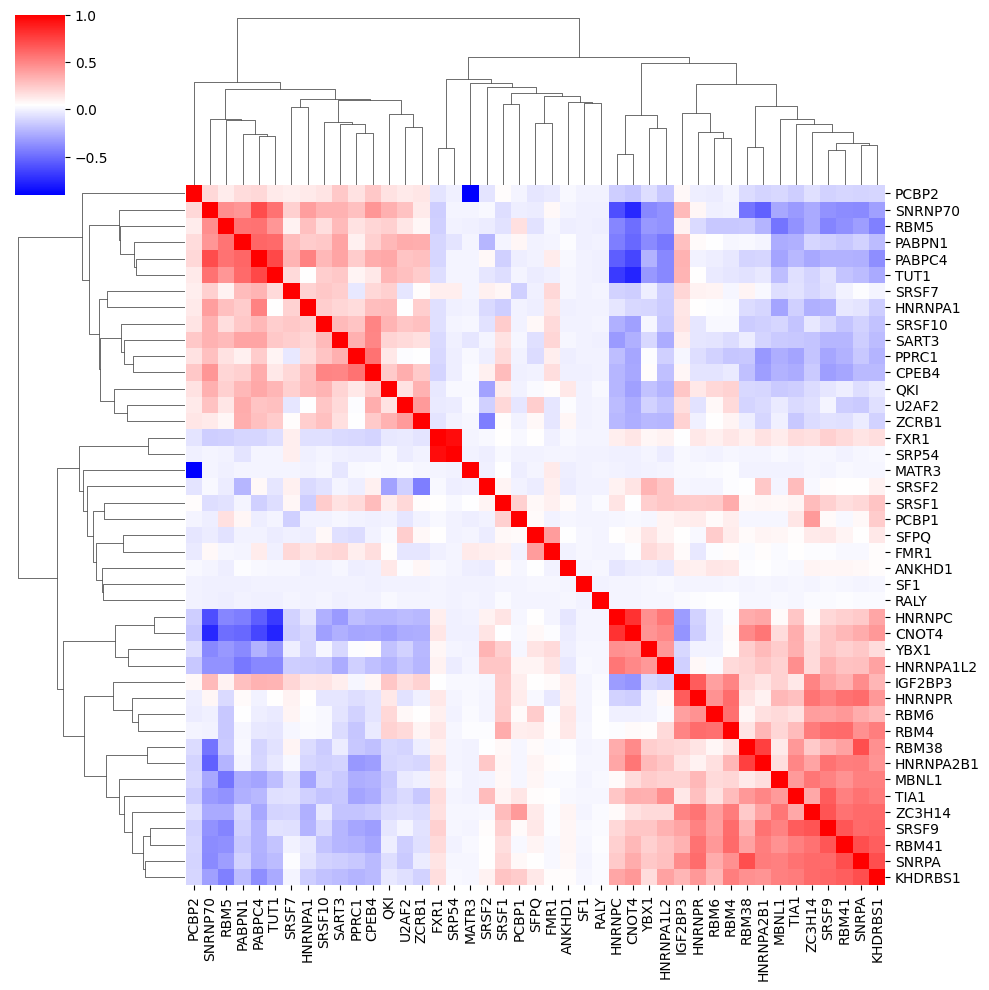

In [36]:
# lets cluster columns based on their correlation
corr1 = rbp_redu.corr()
# show all the names in the yticks
sns.clustermap(corr1, cmap='bwr', xticklabels=True, yticklabels=True)

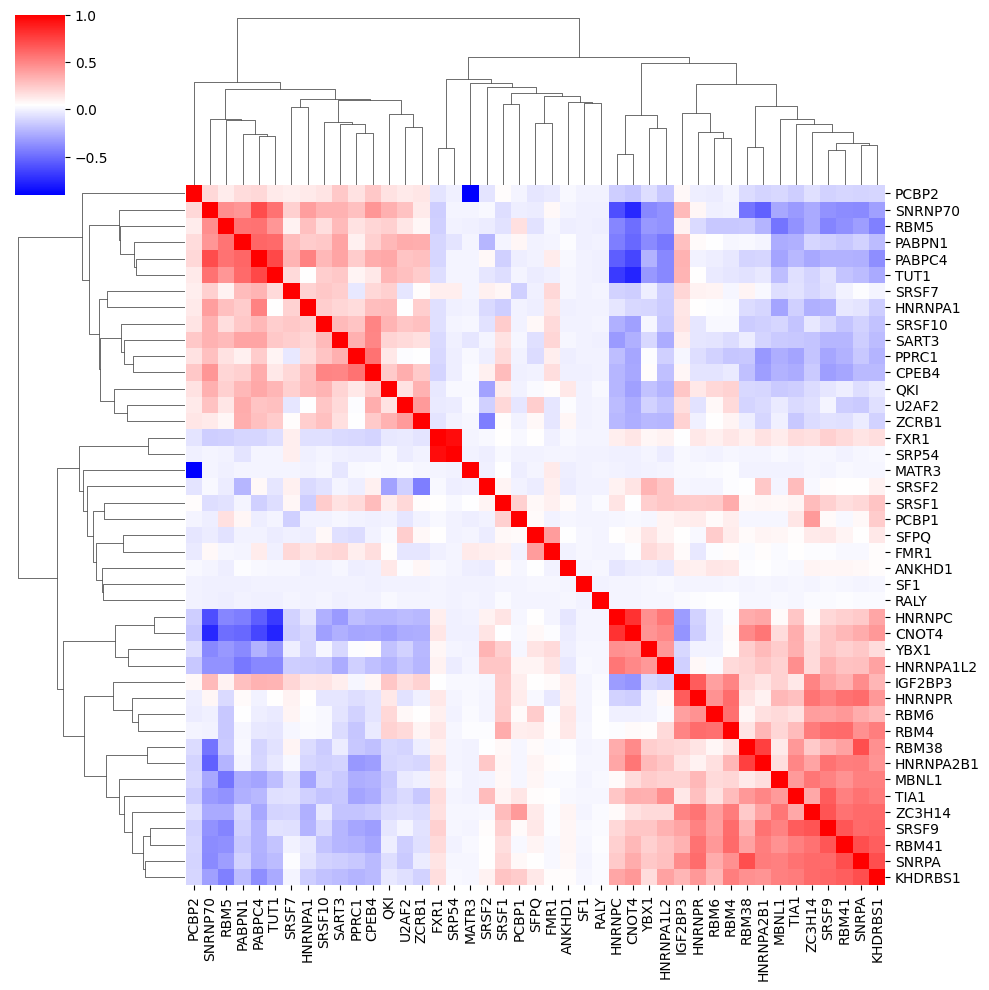

In [37]:
rbp_redi_n = list(set(rbp_df['rbp_name']).intersection(set(perturbation_df_redi.columns)))
rbp_redi = perturbation_df_redi[rbp_redi_n]
# remove NA and inf values
cpa_df_redi = rbp_redi.replace([np.inf, -np.inf], np.nan)
cpa_df_redi = rbp_redi.dropna()
# lets cluster columns based on their correlation
corr2 = cpa_df_redi.corr()
sns.clustermap(corr1, cmap='bwr', xticklabels=True, yticklabels=True)

In [26]:
import pandas as pd

stratification_redu = {}
df1 = rbp_redu.copy()
df2 = rbp_redi.copy()
# Stratify Affected Genes and Calculate Separate Medians
for perturbation in df1.columns:
    positive_values_redu = df1[perturbation][df1[perturbation] > 0]
    negative_values_redu = df1[perturbation][df1[perturbation] < 0]
    netative_values_redi= df2[perturbation][df2[perturbation] < 0]

    positive_count_redu = len(positive_values_redu)
    negative_count_redu = len(positive_values_redu)
    negative_count_redi = len(netative_values_redi)
    median_positive_redu = positive_values_redu.median() if positive_count_redu > 0 else 0
    median_negative_redu = negative_values_redu.median() if negative_count_redu > 0 else 0
    median_negative_redi = netative_values_redi.median() if negative_count_redi > 0 else 0

    stratification_redu[perturbation] = {
        'positive_count_redu': positive_count_redu, 
        'negative_count_redu': negative_count_redu, 
        'median_positive_redu': median_positive_redu, 
        'median_negative_redu': median_negative_redu,
        'negative_count_redi': negative_count_redi,
        'median_negative_redi': median_negative_redi
    }

# Convert to DataFrame
stratification_df = pd.DataFrame(stratification_redu).T  # Transpose to get perturbations as rows
stratification_df = stratification_df.fillna(0)

# Display the DataFrame
stratification_df

,positive_count_redu,negative_count_redu,median_positive_redu,median_negative_redu,negative_count_redi,median_negative_redi
PPRC1,6.0,6.0,2.035,-3.055,40.0,-2.590
HNRNPC,50.0,50.0,12.950,-8.470,15.0,-4.920
SRSF9,35.0,35.0,6.970,-2.875,4.0,-4.270
CPEB4,5.0,5.0,2.060,-3.520,27.0,-3.500
SF1,43.0,43.0,3.320,-3.215,20.0,-2.145
SRSF1,21.0,21.0,2.540,-1.960,11.0,-2.170
SFPQ,33.0,33.0,2.540,-1.360,10.0,-2.140
PABPC4,1.0,1.0,1.170,-6.475,8.0,-6.510
RBM41,17.0,17.0,7.070,-4.000,12.0,-2.285
PABPN1,3.0,3.0,3.150,-3.190,22.0,-3.400


In [27]:
stratification_df.to_csv('/data1/wgs_APA/results/JW/JW_RBPs_stratification_df.csv')

In [28]:
stratification_df['gene'] = stratification_df.index
len(stratification_df['gene'].unique())
stratification_df['gene'] = stratification_df.index

In [29]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

43

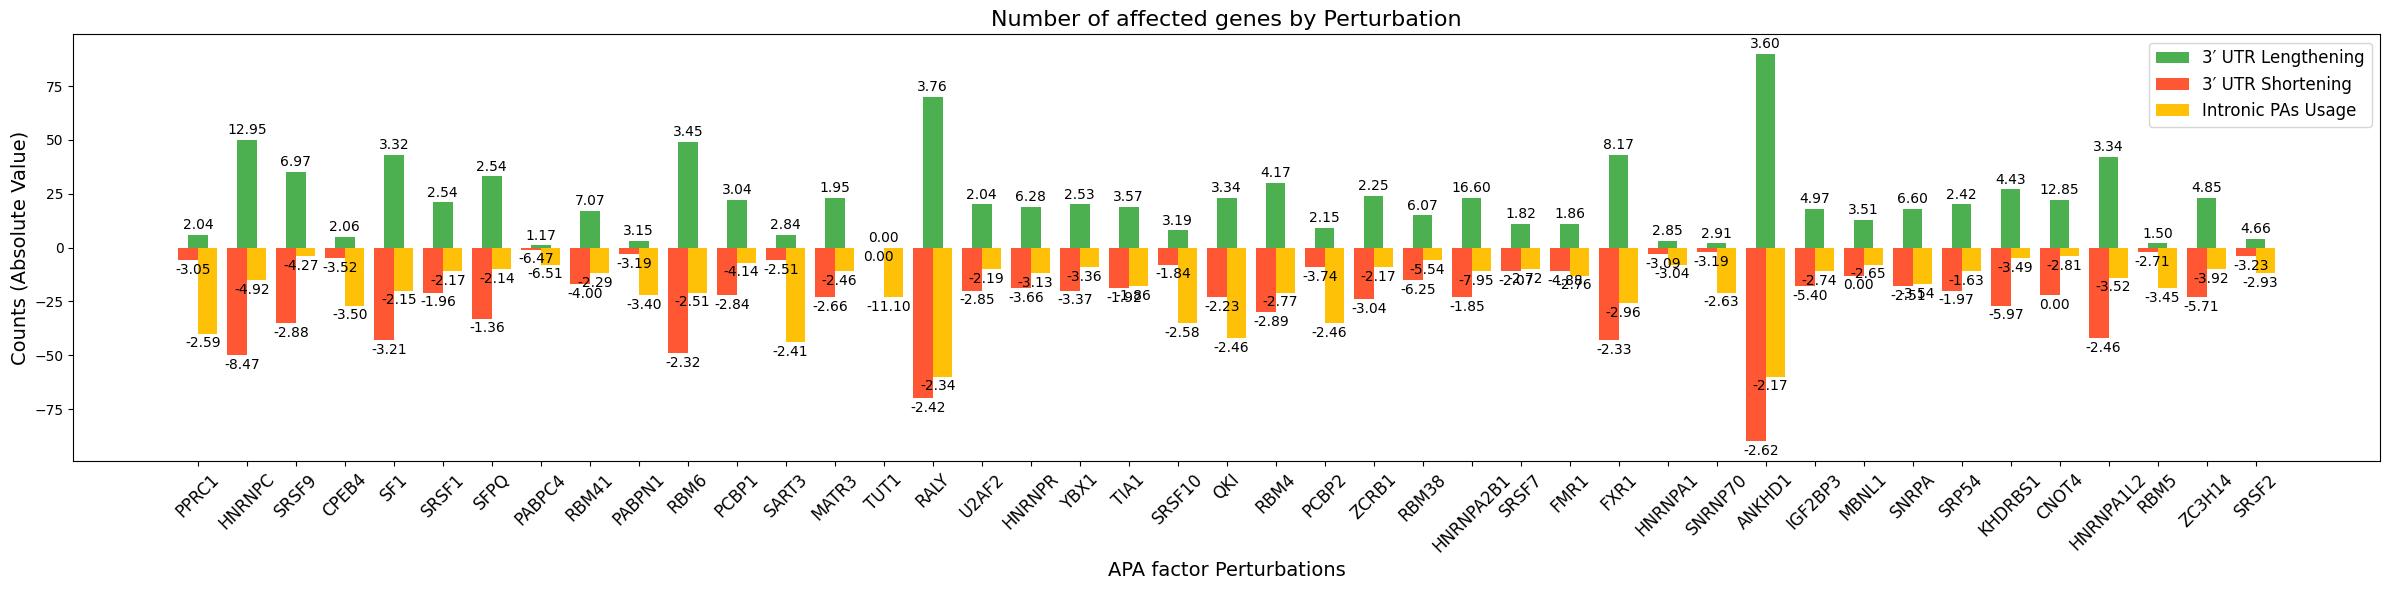

In [35]:
# Assuming stratification_df is your DataFrame
df_subset = stratification_df.copy()

# Values for plotting
perturbations = np.arange(len(df_subset))  # Numeric indices for perturbations
positive_counts = df_subset['positive_count_redu']
negative_counts = df_subset['negative_count_redu']
median_positive = df_subset['median_positive_redu']
median_negative = df_subset['median_negative_redu']
median_negative_redi = df_subset['median_negative_redi']
negative_count_redi = df_subset['negative_count_redi']

# Create a new figure and set the size
plt.figure(figsize=(24, 6))  # Adjusted for horizontal orientation

# Create horizontal bar plots
plt.bar(perturbations, positive_counts, width=0.4, color='#4CAF50', label='3′ UTR Lengthening')
plt.bar(perturbations - 0.2, -negative_counts, width=0.4, color='#FF5733', label='3′ UTR Shortening')
plt.bar(perturbations + 0.2, -negative_count_redi, width=0.4, color='#FFC107', label='Intronic PAs Usage')

# Adding labels and title
plt.xlabel('APA factor Perturbations', fontsize=14)
plt.ylabel('Counts (Absolute Value)', fontsize=14)
plt.title('Number of affected genes by Perturbation', fontsize=16)

# Customize x-ticks to show gene names
plt.xticks(perturbations, df_subset['gene'], fontsize=12, rotation=45)

# Adding legend
plt.legend(fontsize=12)

offset = max(positive_counts.max(), negative_counts.max(), negative_count_redi.max()) * 0.05  # Adjusted offset for text
for i, (pc, nc, mp, mn, mn_redi, nc_redi) in enumerate(zip(positive_counts, negative_counts, median_positive, median_negative, median_negative_redi, negative_count_redi)):
    # For positive counts
    plt.text(i, pc + offset, f"{mp:.2f}", va='center', ha='center', fontsize=10, color='black')
    
    # For negative counts (3' UTR Shortening)
    plt.text(i - 0.1, -nc - offset, f"{mn:.2f}", va='center', ha='center', fontsize=10, color='black')
    
    # For negative counts (Intronic PAs Usage)
    plt.text(i + 0.1, -nc_redi - offset, f"{mn_redi:.2f}", va='center', ha='center', fontsize=10, color='black')

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot

# save as pdf
plt.savefig('/data1/wgs_APA/results/JW/JW_RBPs_stratification.pdf', format='pdf')
plt.savefig('/data1/wgs_APA/results/JW/JW_RBPs_stratification.svg', format='svg')
plt.show()

In [38]:
# /data1/wgs_APA/results/JW/
# lets save, cpa_df_redu, cpa_df_redi, corr1, corr2 and stratification_df
rbp_redu.to_csv('/data1/wgs_APA/results/JW/rbp_df_redu.csv')
rbp_redi.to_csv('/data1/wgs_APA/results/JW/rbp_df_redi.csv')
corr1.to_csv('/data1/wgs_APA/results/JW/rbp_df_redu_corr1.csv')
corr2.to_csv('/data1/wgs_APA/results/JW/rbp_df_redi_corr2.csv')